In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('./data/churn.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# no need off customer ID
df.drop('customerID', axis=1, inplace=True)

In [5]:
# Convert TotalCharges to numeric, handling any non-numeric values
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

In [6]:
df["TotalCharges"].isna().sum()

np.int64(11)

In [7]:
# Drop rows with NaN values in TotalCharges column
df.dropna(subset=['TotalCharges'], inplace=True)

In [8]:
df["TotalCharges"].isna().sum()

np.int64(0)

In [9]:
cat_col = [col for col in df.columns if df[col].dtype == "object"]
cat_col

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [10]:
num_col = [col for col in df.columns if df[col].dtype != "object"]
num_col

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [11]:
df[cat_col].head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [12]:
df[num_col].head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [13]:
# cat_col info
for i in cat_col:
    print("column name: ",i)
    print("value counts: ",df[i].value_counts())
    print("unique values: ",df[i].unique())
    print("null values: ",df[i].isnull().sum())
    print("----------------------------------")

column name:  gender
value counts:  gender
Male      3549
Female    3483
Name: count, dtype: int64
unique values:  ['Female' 'Male']
null values:  0
----------------------------------
column name:  Partner
value counts:  Partner
No     3639
Yes    3393
Name: count, dtype: int64
unique values:  ['Yes' 'No']
null values:  0
----------------------------------
column name:  Dependents
value counts:  Dependents
No     4933
Yes    2099
Name: count, dtype: int64
unique values:  ['No' 'Yes']
null values:  0
----------------------------------
column name:  PhoneService
value counts:  PhoneService
Yes    6352
No      680
Name: count, dtype: int64
unique values:  ['No' 'Yes']
null values:  0
----------------------------------
column name:  MultipleLines
value counts:  MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64
unique values:  ['No phone service' 'No' 'Yes']
null values:  0
----------------------------------
column name:  Inte

In [14]:
l = ["StreamingMovies", "StreamingTV", "TechSupport", "DeviceProtection", "OnlineBackup", "OnlineSecurity", "MultipleLines"]

In [15]:
for i in l:
    u = df[i].unique()
    if 'No internet service' in u:
        df[i] = df[i].replace({'No internet service': 'No'})
    elif 'No phone service' in u:
        df[i] = df[i].replace({'No phone service': 'No'})
    else:
        print("no changes...!!")

In [16]:
# cat_col info
for i in cat_col:
    print("column name: ",i)
    print("value counts: ",df[i].value_counts())
    print("unique values: ",df[i].unique())
    # print("null values: ",df[i].isnull().sum())
    print("..................................................................")
    print("value_counts:", df[i].value_counts(normalize=True))
    print("..................................................................")
    print("--------------------------------------------------------------------")

column name:  gender
value counts:  gender
Male      3549
Female    3483
Name: count, dtype: int64
unique values:  ['Female' 'Male']
..................................................................
value_counts: gender
Male      0.504693
Female    0.495307
Name: proportion, dtype: float64
..................................................................
--------------------------------------------------------------------
column name:  Partner
value counts:  Partner
No     3639
Yes    3393
Name: count, dtype: int64
unique values:  ['Yes' 'No']
..................................................................
value_counts: Partner
No     0.517491
Yes    0.482509
Name: proportion, dtype: float64
..................................................................
--------------------------------------------------------------------
column name:  Dependents
value counts:  Dependents
No     4933
Yes    2099
Name: count, dtype: int64
unique values:  ['No' 'Yes']
............................

```
Churn 70/30
Tech support 70/30
Online Security 70/30
Dependents 70/30
SeniorCitizen 80/30
PhoneService 90/10

In [17]:
# num_col info
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


prompt: create Distribution plots for num_col, Correlation analysis for num_col, Bar plots for cat_col, Relationship between categorical and num_col

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


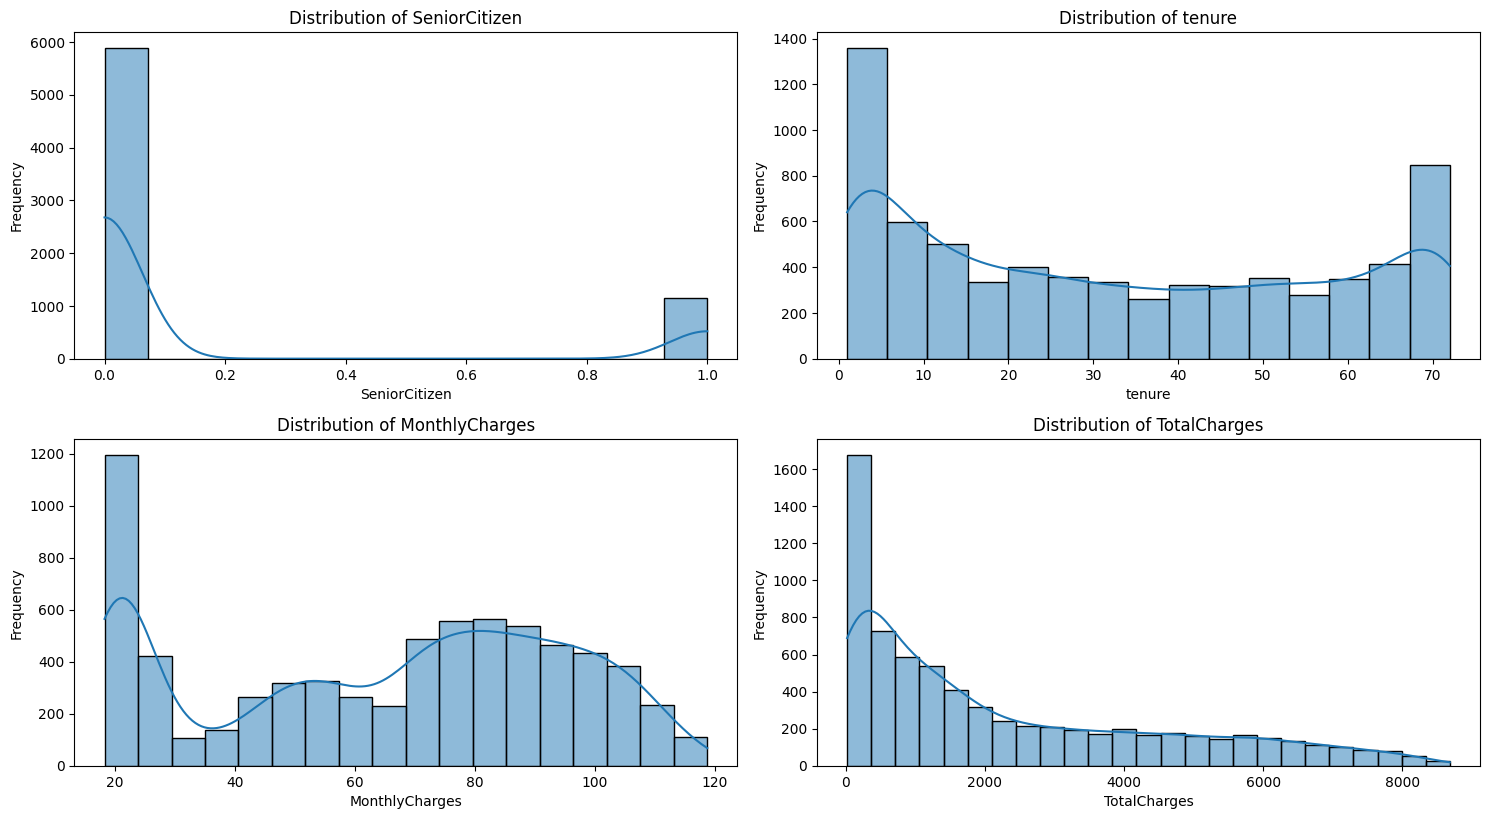

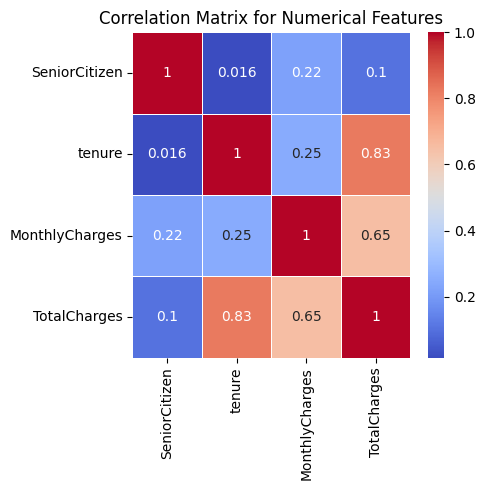

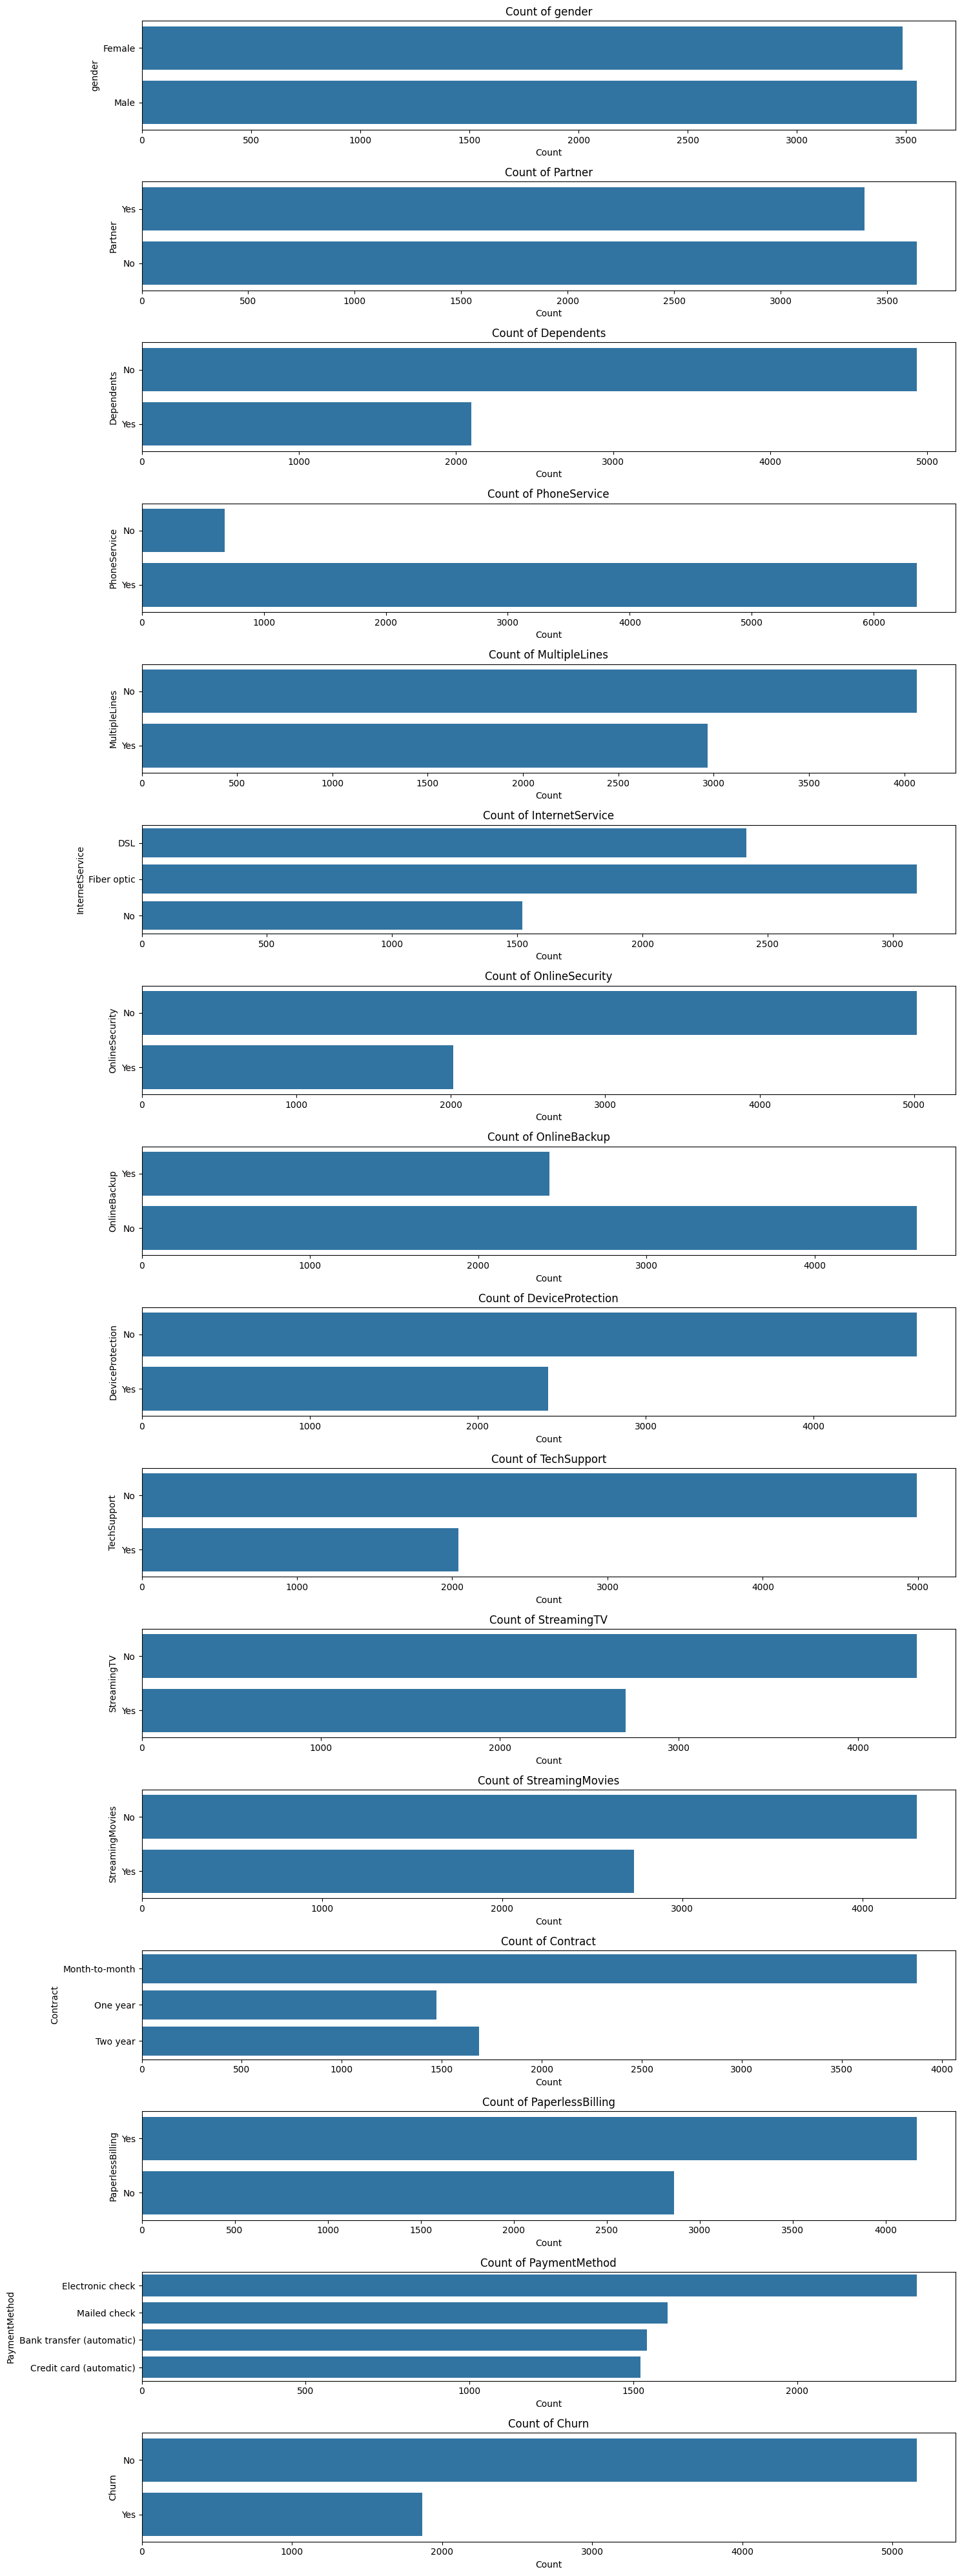

In [18]:
print(num_col)
print(cat_col)
# Distribution plots for numerical columns
plt.figure(figsize=(15, 16))
for i, col in enumerate(num_col):
    plt.subplot(4, 2, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Correlation analysis for numerical columns
plt.figure(figsize=(5, 5))
correlation_matrix = df[num_col].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Numerical Features')
plt.tight_layout()
plt.show()

# Bar plots for categorical columns
plt.figure(figsize=(15, 40))
for i, col in enumerate(cat_col):
    plt.subplot(len(cat_col), 1, i+1)
    sns.countplot(y=df[col])
    plt.title(f'Count of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
plt.tight_layout()
plt.show()



### Encoding categorical data

In [19]:
label_lst = [col for col in df[cat_col] if len(df[col].unique()) == 2]
other_lst = [col for col in df[cat_col] if len(df[col].unique()) > 2]
print(label_lst)
print(other_lst)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
['InternetService', 'Contract', 'PaymentMethod']


In [20]:
# manully encode the categorical data
for i in label_lst:
    u = df[i].unique()
    if "Male" in u:
        df[i] = df[i].replace({'Male': 1, 'Female': 0})
    elif "No" in u:
        df[i] = df[i].replace({'No': 0, 'Yes': 1})
    else:
        print("No changes...!!!")    

C:\Users\dp971\AppData\Local\Temp\ipykernel_23856\3427708077.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[i] = df[i].replace({'Male': 1, 'Female': 0})
C:\Users\dp971\AppData\Local\Temp\ipykernel_23856\3427708077.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[i] = df[i].replace({'No': 0, 'Yes': 1})


In [21]:
# # manually encoded
# df['Contract'] = df['Contract'].map({
#     'Month-to-month': 0,
#     'One year': 1,
#     'Two year': 2
# })


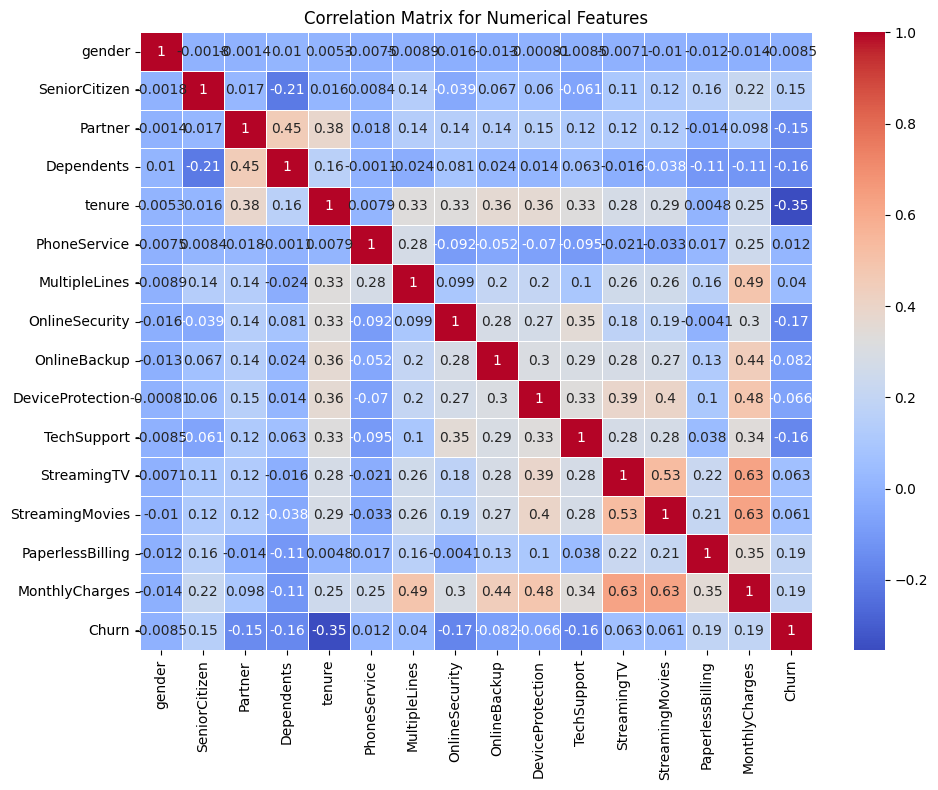

In [22]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.drop(columns=['InternetService', 'PaymentMethod', 'TotalCharges', 'Contract'], axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Numerical Features')
plt.tight_layout()
plt.show()


In [23]:
# Calculate Variance Inflation Factor (VIF) to detect multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# Create a dataframe for VIF calculation, excluding categorical variables that need encoding
vif_data = df.drop(columns=['InternetService', 'PaymentMethod', 'Churn', 'TotalCharges', 'PhoneService', 'Contract'], axis=1)

# Calculate VIF for each feature
vif_df = pd.DataFrame()
vif_df["Feature"] = vif_data.columns
vif_df["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]

# Sort VIF values in descending order
vif_df = vif_df.sort_values("VIF", ascending=False)

# Display VIF values
print("Variance Inflation Factors:")
print(vif_df)

# Identify features with high multicollinearity (VIF > 10)
high_vif_features = vif_df[vif_df["VIF"] > 10]["Feature"].tolist()
if high_vif_features:
    print(f"\nFeatures with high multicollinearity (VIF > 10): {high_vif_features}")
else:
    print("\nNo features with high multicollinearity (VIF > 10)")


Variance Inflation Factors:
             Feature        VIF
13    MonthlyCharges  10.772384
4             tenure   4.072082
11   StreamingMovies   2.813407
2            Partner   2.810575
12  PaperlessBilling   2.803370
10       StreamingTV   2.774640
5      MultipleLines   2.471097
8   DeviceProtection   2.219359
7       OnlineBackup   2.062754
9        TechSupport   1.895751
3         Dependents   1.870203
0             gender   1.830250
6     OnlineSecurity   1.819204
1      SeniorCitizen   1.352362

Features with high multicollinearity (VIF > 10): ['MonthlyCharges']


“I checked for multicollinearity using VIF and found MonthlyCharges had a VIF of 11. I decided to keep it because it’s a business-critical feature with predictive value and only a single high-VIF feature doesn’t threaten model performance. Since I plan to use tree-based models, which are robust to multicollinearity, I kept it in the final feature set.”

# also drop it and check: 'TotalCharges', 'PhoneService'

In [24]:
# Split the data into features (X) and target (y)
X = df.drop(['Churn', 'TotalCharges', 'PhoneService'], axis=1) 
y = df['Churn']



In [25]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Print the shapes to verify the split
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (5625, 17)
X_test shape: (1407, 17)
y_train shape: (5625,)
y_test shape: (1407,)


In [26]:
onehot_lst = ['InternetService', 'PaymentMethod', 'Contract']
num_col = ['tenure', 'MonthlyCharges']
# Apply one-hot encoding to categorical features
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform the categorical columns
encoded_features = encoder.fit_transform(X_train[onehot_lst])

# Get the feature names after one-hot encoding
encoded_feature_names = encoder.get_feature_names_out(onehot_lst)

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=X_train.index)

# Drop the original categorical columns and concatenate the encoded features
X_train = pd.concat([X_train.drop(onehot_lst, axis=1), encoded_df], axis=1)

# Apply the same transformation to the test set
encoded_features_test = encoder.transform(X_test[onehot_lst])
encoded_df_test = pd.DataFrame(encoded_features_test, columns=encoded_feature_names, index=X_test.index)
X_test = pd.concat([X_test.drop(onehot_lst, axis=1), encoded_df_test], axis=1)

# Apply StandardScaler to numerical features
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns in the training set
X_train[num_col] = scaler.fit_transform(X_train[num_col])

# Transform the numerical columns in the test set
X_test[num_col] = scaler.transform(X_test[num_col])

# # Display the first few rows of the transformed training data
# print("Transformed training data:")
# print(X_train.head())


In [27]:
X_train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'InternetService_Fiber optic', 'InternetService_No',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_One year', 'Contract_Two year'],
      dtype='object')

### removing low important features

 MultipleLines    0.007237
10                            StreamingTV    0.007168
16  PaymentMethod_Credit card (automatic)    0.006182
8                        DeviceProtection    0.005819
18             PaymentMethod_Mailed check    0.005053
0                                  gender    0.003413



In [28]:
X_train = X_train.drop(columns=['MultipleLines', 'StreamingTV', 'PaymentMethod_Credit card (automatic)', 'DeviceProtection', 'PaymentMethod_Mailed check', 'gender'], axis=1)

X_test = X_test.drop(columns=['MultipleLines', 'StreamingTV', 'PaymentMethod_Credit card (automatic)', 'DeviceProtection', 'PaymentMethod_Mailed check', 'gender'], axis=1)

In [29]:
# Calculate Variance Inflation Factor (VIF) to detect multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# Create a dataframe for VIF calculation, excluding categorical variables that need encoding
vif_data = X_train

# Calculate VIF for each feature
vif_df = pd.DataFrame()
vif_df["Feature"] = vif_data.columns
vif_df["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]

# Sort VIF values in descending order
vif_df = vif_df.sort_values("VIF", ascending=False)

# Display VIF values
print("Variance Inflation Factors:")
print(vif_df)

# Identify features with high multicollinearity (VIF > 10)
high_vif_features = vif_df[vif_df["VIF"] > 10]["Feature"].tolist()
if high_vif_features:
    print(f"\nFeatures with high multicollinearity (VIF > 10): {high_vif_features}")
else:
    print("\nNo features with high multicollinearity (VIF > 10)")


Variance Inflation Factors:
                           Feature       VIF
9                   MonthlyCharges  9.167644
10     InternetService_Fiber optic  6.025554
11              InternetService_No  4.820771
14               Contract_Two year  3.189857
1                          Partner  2.775982
7                  StreamingMovies  2.752169
8                 PaperlessBilling  2.693465
3                           tenure  2.308944
6                      TechSupport  1.963732
2                       Dependents  1.962482
5                     OnlineBackup  1.957616
13               Contract_One year  1.908553
12  PaymentMethod_Electronic check  1.860289
4                   OnlineSecurity  1.778843
0                    SeniorCitizen  1.351760

No features with high multicollinearity (VIF > 10)


In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5625, 15), (1407, 15), (5625,), (1407,))

In [31]:
X_train

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,TechSupport,StreamingMovies,PaperlessBilling,MonthlyCharges,InternetService_Fiber optic,InternetService_No,PaymentMethod_Electronic check,Contract_One year,Contract_Two year
1413,0,1,1,1.321816,1,1,1,0,0,0.981556,1.0,0.0,0.0,0.0,1.0
7003,0,0,0,-0.267410,0,0,1,0,0,-0.971546,0.0,0.0,1.0,0.0,0.0
3355,0,1,0,1.444064,0,1,1,0,0,0.837066,1.0,0.0,0.0,0.0,1.0
4494,0,0,0,-1.204646,0,1,0,1,0,0.641092,1.0,0.0,1.0,0.0,0.0
3541,0,1,0,0.669826,1,0,0,0,0,-0.808787,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3451,1,1,0,1.321816,0,0,0,0,1,0.197658,1.0,0.0,0.0,1.0,0.0
5123,1,0,0,-0.715654,0,1,0,0,1,0.342148,1.0,0.0,0.0,0.0,0.0
4135,0,1,1,0.140084,1,1,1,1,1,0.926749,0.0,0.0,0.0,0.0,1.0
4249,0,1,1,-0.919401,0,1,0,1,1,0.029917,0.0,0.0,0.0,1.0,0.0


In [32]:
X_test

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,TechSupport,StreamingMovies,PaperlessBilling,MonthlyCharges,InternetService_Fiber optic,InternetService_No,PaymentMethod_Electronic check,Contract_One year,Contract_Two year
974,0,1,1,1.077320,0,1,1,1,1,0.363738,0.0,0.0,0.0,0.0,1.0
619,0,0,0,-1.041649,0,1,0,0,1,0.450100,1.0,0.0,0.0,0.0,0.0
4289,0,0,0,0.873573,0,0,0,0,0,-1.491376,0.0,1.0,0.0,0.0,1.0
3721,0,0,0,-1.245396,0,0,0,0,0,-1.473107,0.0,1.0,0.0,0.0,0.0
4533,0,1,0,1.566313,0,1,0,1,1,1.333645,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4829,0,0,0,-0.837902,0,0,0,0,1,-0.664297,0.0,0.0,0.0,0.0,0.0
5176,0,0,1,-0.267410,1,0,1,1,0,-0.637725,0.0,0.0,0.0,0.0,0.0
2750,0,0,0,-1.204646,0,0,0,0,1,-1.512966,0.0,1.0,0.0,1.0,0.0
4432,0,0,0,0.180833,1,1,1,0,1,-0.812109,0.0,0.0,0.0,0.0,1.0


In [33]:
# X_train[X_train['TotalCharges'].isna()]

Training Logistic Regression...
Test: 
 [[732 301]
 [ 81 293]]
Training Decision Tree...
Test: 
 [[916 117]
 [191 183]]
Training Random Forest...
Test: 
 [[753 280]
 [ 83 291]]
Training xgboost...
Test: 
 [[894 139]
 [181 193]]
Training catboost...
Test: 
 [[916 117]
 [173 201]]


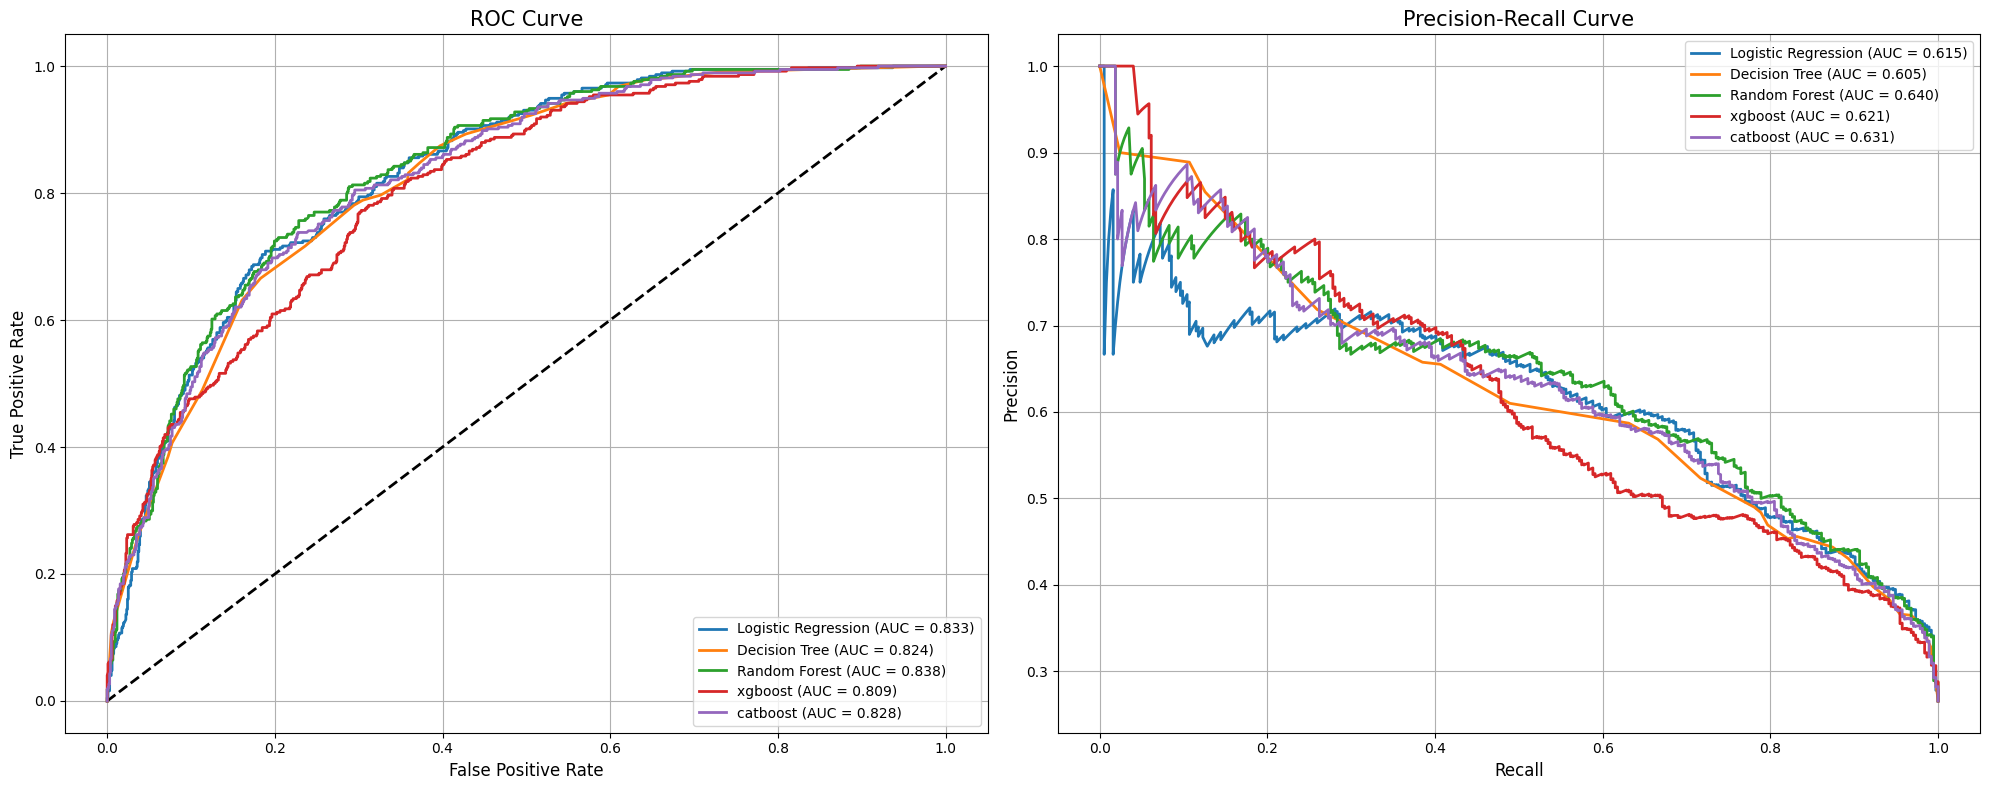


Model Performance Comparison:
                     Train_Accuracy  Test_Accuracy  Precision  Recall  \
Model                                                                   
Logistic Regression           0.752          0.729      0.493   0.783   
Decision Tree                 0.799          0.781      0.610   0.489   
Random Forest                 0.777          0.742      0.510   0.778   
xgboost                       0.915          0.773      0.581   0.516   
catboost                      0.864          0.794      0.632   0.537   

                     F1-Score  ROC AUC  PR AUC  
Model                                           
Logistic Regression     0.605    0.833   0.615  
Decision Tree           0.543    0.824   0.605  
Random Forest           0.616    0.838   0.640  
xgboost                 0.547    0.809   0.621  
catboost                0.581    0.828   0.631  

Best model based on F1-Score: Random Forest
F1-Score: 0.616


In [34]:
# Import necessary libraries
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
random_state = 42
# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(class_weight="balanced", random_state=random_state, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=random_state),
    'Random Forest': RandomForestClassifier(class_weight='balanced', min_samples_split=100, n_estimators=1000, random_state=42),
    'xgboost': XGBClassifier(random_state=random_state),
    'catboost': CatBoostClassifier(random_state=random_state, verbose=0),
}

# Dictionary to store results
results = {
    'Model': [],
    'Train_Accuracy': [],
    'Test_Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'ROC AUC': [],
    'PR AUC': []
}

# Prepare plots for ROC and PR curves
plt.figure(figsize=(20, 8))

# ROC curve subplot
plt.subplot(1, 2, 1)
plt.title('ROC Curve', fontsize=15)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.grid(True)

# PR curve subplot
plt.subplot(1, 2, 2)
plt.title('Precision-Recall Curve', fontsize=15)
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.grid(True)

# Fit models and evaluate performance
for name, model in models.items():
    # Fit the model
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    
    # For ROC curve, we need probability estimates
    y_train_pred_proba = model.predict_proba(X_train)[:, 1]

    # Make predictions
    y_pred = model.predict(X_test)
    
    # For ROC curve, we need probability estimates
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = average_precision_score(y_test, y_pred_proba)
    
    # Plot ROC curve
    plt.subplot(1, 2, 1)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')
    
    # Plot PR curve
    plt.subplot(1, 2, 2)
    plt.plot(recall_curve, precision_curve, lw=2, label=f'{name} (AUC = {pr_auc:.3f})')
    

    confusion_matrix_result = confusion_matrix(y_test, y_pred)
    print('Test: \n',confusion_matrix_result)
    
    # Store results
    results['Model'].append(name)
    results['Train_Accuracy'].append(train_accuracy)
    results['Test_Accuracy'].append(test_accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1)
    results['ROC AUC'].append(roc_auc)
    results['PR AUC'].append(pr_auc)

# Add legends to plots
plt.subplot(1, 2, 1)
plt.legend(loc='lower right', fontsize=10)

plt.subplot(1, 2, 2)
plt.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

# Create a DataFrame for the results and display it
results_df = pd.DataFrame(results)
results_df = results_df.set_index('Model')
results_df = results_df.round(3)  # Round to 3 decimal places for readability

print("\nModel Performance Comparison:")
print(results_df)

# Identify the best model based on F1-Score
best_model_idx = results_df['F1-Score'].idxmax()
print(f"\nBest model based on F1-Score: {best_model_idx}")
print(f"F1-Score: {results_df.loc[best_model_idx, 'F1-Score']}")


In [35]:
def training_model(model, X_train, y_train):
    # Dictionary to store results
    results = {
        'Model': [],
        'Train_Accuracy': [],
        'Test_Accuracy': [],
        'Precision': [],
        'Recall': [],
        'F1-Score': [],
        'ROC AUC': [],
        'PR AUC': []
    }

    # Prepare plots for ROC and PR curves
    plt.figure(figsize=(20, 8))

    # ROC curve subplot
    plt.subplot(1, 2, 1)
    plt.title('ROC Curve', fontsize=15)
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.grid(True)

    # PR curve subplot
    plt.subplot(1, 2, 2)
    plt.title('Precision-Recall Curve', fontsize=15)
    plt.xlabel('Recall', fontsize=12)
    plt.ylabel('Precision', fontsize=12)
    plt.grid(True)

    # Fit models and evaluate performance
    for name, model in models.items():
        # Fit the model
        print(f"Training {name}...")
        model.fit(X_train, y_train)
        
        # Make predictions
        y_train_pred = model.predict(X_train)
        
        # For ROC curve, we need probability estimates
        y_train_pred_proba = model.predict_proba(X_train)[:, 1]

        # Make predictions
        y_pred = model.predict(X_test)
        
        # For ROC curve, we need probability estimates
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        
        # Calculate metrics
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_proba)
        pr_auc = average_precision_score(y_test, y_pred_proba)
        
        # Plot ROC curve
        plt.subplot(1, 2, 1)
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')
        
        # Plot PR curve
        plt.subplot(1, 2, 2)
        plt.plot(recall_curve, precision_curve, lw=2, label=f'{name} (AUC = {pr_auc:.3f})')
        
        confusion_matrix_result = confusion_matrix(y_test, y_pred)
        print(confusion_matrix_result)
        
        # Store results
        results['Model'].append(name)
        results['Train_Accuracy'].append(train_accuracy)
        results['Test_Accuracy'].append(test_accuracy)
        results['Precision'].append(precision)
        results['Recall'].append(recall)
        results['F1-Score'].append(f1)
        results['ROC AUC'].append(roc_auc)
        results['PR AUC'].append(pr_auc)

    # Add legends to plots
    plt.subplot(1, 2, 1)
    plt.legend(loc='lower right', fontsize=10)

    plt.subplot(1, 2, 2)
    plt.legend(loc='upper right', fontsize=10)

    plt.tight_layout()
    plt.show()

    # Create a DataFrame for the results and display it
    results_df = pd.DataFrame(results)
    results_df = results_df.set_index('Model')
    results_df = results_df.round(3)  # Round to 3 decimal places for readability

    print("\nModel Performance Comparison:")
    print(results_df)

    # Identify the best model based on F1-Score
    best_model_idx = results_df['F1-Score'].idxmax()
    print(f"\nBest model based on F1-Score: {best_model_idx}")
    print(f"F1-Score: {results_df.loc[best_model_idx, 'F1-Score']}")

# cross validation

In [36]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

stratified k-fold as data is imbalanced

In [37]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

Hyperparameter Tuning

In [38]:
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
# from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
# from sklearn.metrics import average_precision_score, make_scorer, classification_report
# import numpy as np

# # Define model
# dt = DecisionTreeClassifier(class_weight="balanced", random_state=42)
# lr = LogisticRegression(class_weight="balanced", random_state=42)
# rf = RandomForestClassifier(class_weight='balanced', random_state=42)
# gb = GradientBoostingClassifier(verbose=1)
# xgb = XGBClassifier(scale_pos_weight=1, random_state=42)

# # Define hyperparameter space
# param_dist = {
#     'n_estimators': [100, 200, 300, 400, 500, 1000],
#     'max_depth': [5, 10, 15, 20, 25],
#     'min_samples_split': [10, 50, 70, 100],
#     'min_samples_leaf': [1, 2, 5, 10],
# },


# # Stratified K-Fold setup
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# # Search
# search = RandomizedSearchCV(
#     estimator=rf,
#     param_distributions=param_dist,
#     cv=cv,
#     n_iter=20,
#     verbose=4,
#     random_state=42,
#     n_jobs=-1
# )

# # Fit to training data
# search.fit(X_train, y_train)

# # Evaluate best model
# best_model = search.best_estimator_
# print("Best model:", best_model)


# y_train_pred = best_model.predict(X_train)
# y_pred = best_model.predict(X_test)
# y_proba = best_model.predict_proba(X_test)[:, 1]
# print("train_accuracy =" ,accuracy_score(y_train, y_train_pred))
# print("test_accuracy =" ,accuracy_score(y_test, y_pred))
# print("Best PR-AUC:", average_precision_score(y_test, y_proba))
# print(classification_report(y_test, y_pred))
# print("f1: ", f1_score(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))


In [39]:
from sklearn.model_selection import cross_val_score
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# lr = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
lr = RandomForestClassifier(class_weight='balanced', min_samples_split=100, n_estimators=1000, random_state=42)
# 5-fold cross validation on train set
scores = cross_val_score(lr, X_train, y_train, scoring='f1', cv=skf, n_jobs=-1)
print("5-fold cross validation on train set:")
print('Score:', scores)
print('Mean score:', scores.mean())
print()
# Print the mean score and the 95% confidence interval of the score estimate
# 5-fold cross validation on test set
print("5-fold cross validation on test set:")
scores = cross_val_score(lr, X_test, y_test, scoring='f1', cv=skf, n_jobs=-1)
print('Score:', scores)
print('Mean score:', scores.mean())



5-fold cross validation on train set:
Score: [0.63648834 0.64388962 0.62586926 0.64516129 0.64140731]
Mean score: 0.6385631638948078

5-fold cross validation on test set:
Score: [0.6010929  0.62365591 0.61139896 0.62195122 0.59139785]
Mean score: 0.6098993685716978


# random forest beats  the logistic regression

In [40]:
model = RandomForestClassifier(class_weight='balanced', min_samples_split=100, n_estimators=1000, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', min_samples_split=100,
                       n_estimators=1000, random_state=42)

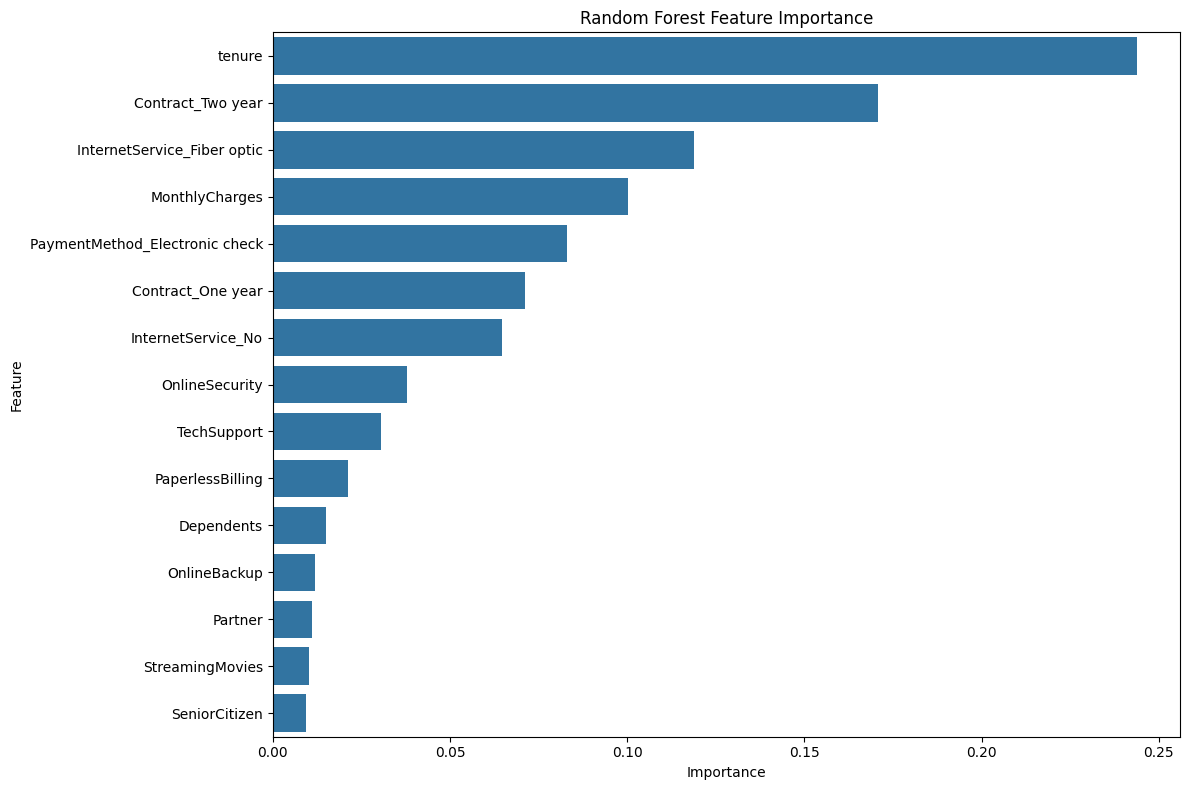

                           Feature  Importance
3                           tenure    0.243810
14               Contract_Two year    0.170723
10     InternetService_Fiber optic    0.118992
9                   MonthlyCharges    0.100205
12  PaymentMethod_Electronic check    0.083053
13               Contract_One year    0.071252
11              InternetService_No    0.064641
4                   OnlineSecurity    0.037849
6                      TechSupport    0.030452
8                 PaperlessBilling    0.021298
2                       Dependents    0.015117
5                     OnlineBackup    0.012007
1                          Partner    0.010991
7                  StreamingMovies    0.010104
0                    SeniorCitizen    0.009506


In [41]:
# Get feature importances from the Random Forest model
importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_names = X_train.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance
importance_df = importance_df.sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

# Print the feature importances
print(importance_df)


In [42]:
# model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
# # First, fit the model to the training data
# model.fit(X_train, y_train)

In [43]:
import shap

background_adult = shap.maskers.Independent(X_train, max_samples=20)

# compute SHAP values
explainer = shap.Explainer(model, background_adult)
shap_values = explainer(X_train)

c:\Users\dp971\Coading\ML_End_To_End_Projects\My ML Prac\classification\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|===================| 11239/11250 [03:06<00:00]        

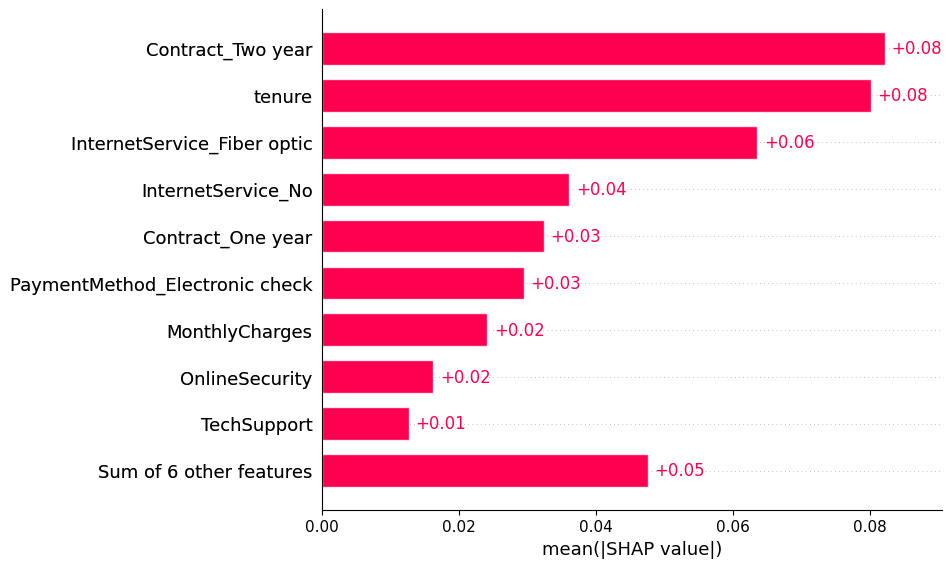

In [44]:
# visualize the first prediction's explanation

# Fix the IndexError by specifying the output class (for classification)
# For binary classification, we need to specify which class to show
shap.plots.bar(shap_values[:, :, 1])  # Show SHAP values for class 1 (churn)

# Alternative approach if the above doesn't work:
# shap.summary_plot(shap_values.values, X_train, plot_type="bar")

 98%|===================| 2769/2814 [00:41<00:00]        

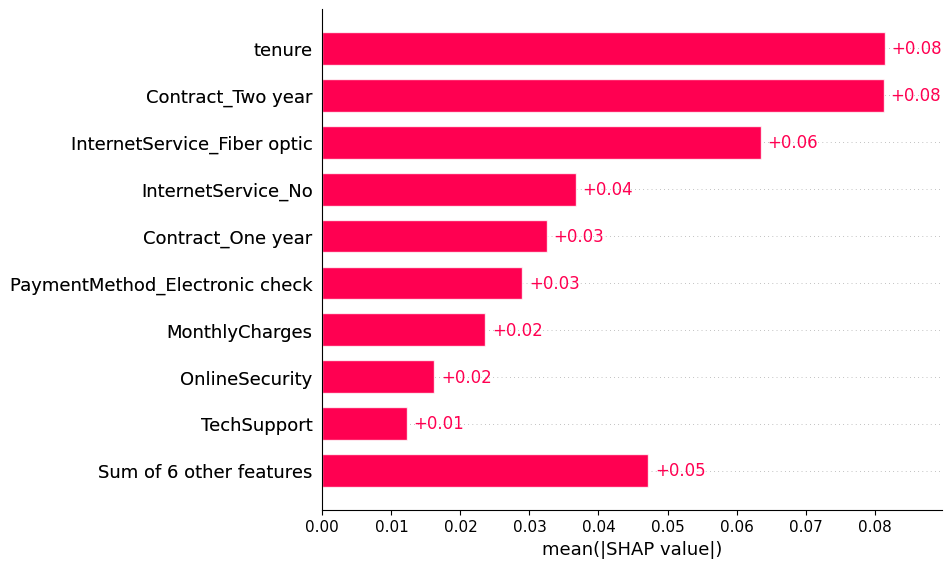

In [45]:
# 1. Use the same explainer already built
shap_values_test = explainer(X_test)

# 2. Plot summary bar (global feature importance on test data)
shap.plots.bar(shap_values_test[:, :, 1])


In [65]:
# # 3. Plot individual prediction explanation (optional)
# shap.plots.waterfall(shap_values_test[0,0])  # Explains first test sample

prediction for random customer

In [48]:
# Example: Pick the 5th customer in X_test
index = 8
X_sample = X_test.iloc[[index]]  # Keep it as a DataFrame
X_sample

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,TechSupport,StreamingMovies,PaperlessBilling,MonthlyCharges,InternetService_Fiber optic,InternetService_No,PaymentMethod_Electronic check,Contract_One year,Contract_Two year
1346,0,1,1,-0.756403,0,0,0,1,1,0.739079,1.0,0.0,1.0,0.0,0.0


In [66]:
# X_sample.to_dict(orient='records')

In [ ]:
y_test.iloc[[8]]

In [50]:
model

RandomForestClassifier(class_weight='balanced', min_samples_split=100,
                       n_estimators=1000, random_state=42)

In [51]:
prob = model.predict_proba(X_sample)[0]
print(f"Predicted churn probability: {prob}")


Predicted churn probability: [0.21048193 0.78951807]


In [52]:
shap_value_single = explainer(X_sample)


In [53]:
shap_value_single.shape

(1, 15, 2)

In [54]:
shap_value_single[0, :, 1]

.values =
array([-0.00226022, -0.00227618, -0.0240734 ,  0.06138841,  0.01537197,
        0.00463932,  0.01195997,  0.00918773,  0.01622994,  0.02935432,
        0.10075927,  0.02835029,  0.03935243,  0.02437635,  0.07611147])

.base_values =
np.float64(0.40107063837537577)

.data =
array([ 0.        ,  1.        ,  1.        , -0.75640301,  0.        ,
        0.        ,  0.        ,  1.        ,  1.        ,  0.73907892,
        1.        ,  0.        ,  1.        ,  0.        ,  0.        ])

In [116]:
l = [ 0.00094741, -0.00256909, -0.00334444, -0.02110472,  0.064709  ,
        0.0040835 ,  0.01596085,  0.0044951 , -0.00060626,  0.01092072,
       -0.00474445,  0.00729185,  0.01544012,  0.03390843,  0.09595672,
        0.02617778,  0.00148878,  0.03841323,  0.001122  ,  0.02448064,
        0.07454116]

In [119]:
len(l)

21

In [120]:
X_test.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'InternetService_Fiber optic', 'InternetService_No',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_One year', 'Contract_Two year'],
      dtype='object')

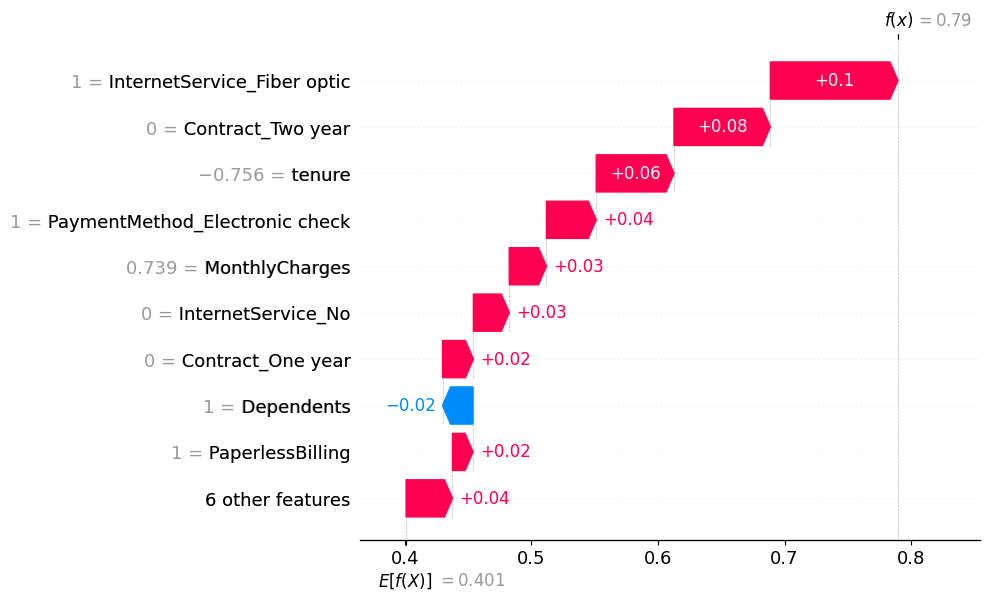

In [55]:
shap.plots.waterfall(shap_value_single[0, :, 1])

In [68]:
import pickle

In [57]:
# # Save the trained model as a pickle file
# import pickle

# # Save the model to a pickle file
# with open('./model/model.pkl', 'wb') as f:
#     pickle.dump(model, f)

# print("Model saved successfully as 'model.pkl'")



Model saved successfully as 'model.pkl'


In [58]:
# Load the model from pickle file
with open('./model/model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

print("Model loaded successfully from 'model.pkl'")


Model loaded successfully from 'model.pkl'


In [59]:
loaded_model.predict_proba(X_sample)

array([[0.21048193, 0.78951807]])

In [70]:
shap_value = explainer(X_sample)


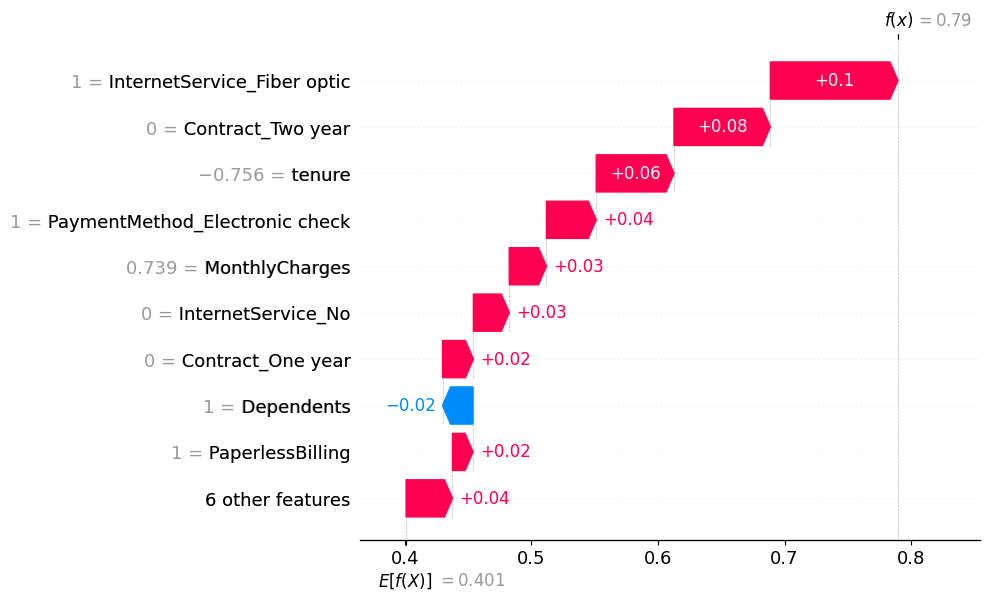

In [71]:
shap.plots.waterfall(shap_value[0, :, 1])